In [18]:
import numpy as np
import torch
from torch import nn
from torch.optim import Adam
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [19]:
# Dataset creation and model definition

def generate_data(samples=1000):
    X = torch.rand(samples, 1, dtype=torch.float32)
    Y = torch.sin(5 * np.pi * X) / (5 * np.pi * X)
    return X, Y

class ModelOptimizer(nn.Module):
    def __init__(self):
        super(ModelOptimizer, self).__init__()
        self.dense1 = nn.Linear(1, 16)
        self.dense2 = nn.Linear(16, 32)
        self.output_layer = nn.Linear(32, 1)

    def forward(self, inputs):
        x = F.relu(self.dense1(inputs))
        x = F.relu(self.dense2(x))
        return self.output_layer(x)

In [20]:
# Function to run the training and collect weights

def optimize_and_collect(model, inputs, targets, total_epochs, batch_iterations):
    second_layer_history = []
    full_model_history = []
    losses = []

    for iteration in range(batch_iterations):
        current_model = ModelOptimizer()
        optimizer = Adam(current_model.parameters(), lr=0.001)

        for epoch in range(total_epochs):
            prediction = current_model(inputs)
            loss = nn.MSELoss()(prediction, targets)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if epoch % 3 == 0:
                layer_weights = current_model.dense2.weight.data.view(-1).numpy()
                model_weights = torch.cat([current_model.dense1.weight.data.view(-1), current_model.dense2.weight.data.view(-1), current_model.output_layer.weight.data.view(-1)]).numpy()
                second_layer_history.append(layer_weights)
                full_model_history.append(model_weights)
                losses.append(loss.item())

    return np.array(second_layer_history), np.array(full_model_history), np.array(losses)


In [21]:
# Parameters and data generation
X_data, Y_data = generate_data()
epochs = 330
iterations = 8

In [22]:
# Optimizing the model
layer2_weights, model_weights, model_losses = optimize_and_collect(ModelOptimizer(), X_data, Y_data, epochs, iterations)

In [23]:
# Applying PCA for dimensionality reduction
def apply_pca(data):
    pca = PCA(n_components=2)
    return pca.fit_transform(data)

In [24]:
# Dimensionality reduction
reduced_layer2 = apply_pca(layer2_weights)
reduced_model = apply_pca(model_weights)

In [25]:
# Visualization of the optimization process
def visualize_optimization(processed_data, loss_values, plot_title):
    plt.figure(figsize=(12, 8))
    points = plt.scatter(processed_data[:, 0], processed_data[:, 1], c=loss_values, cmap='Spectral', marker='.')
    plt.colorbar(points, label='Loss Magnitude')
    plt.title(plot_title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)
    plt.show()

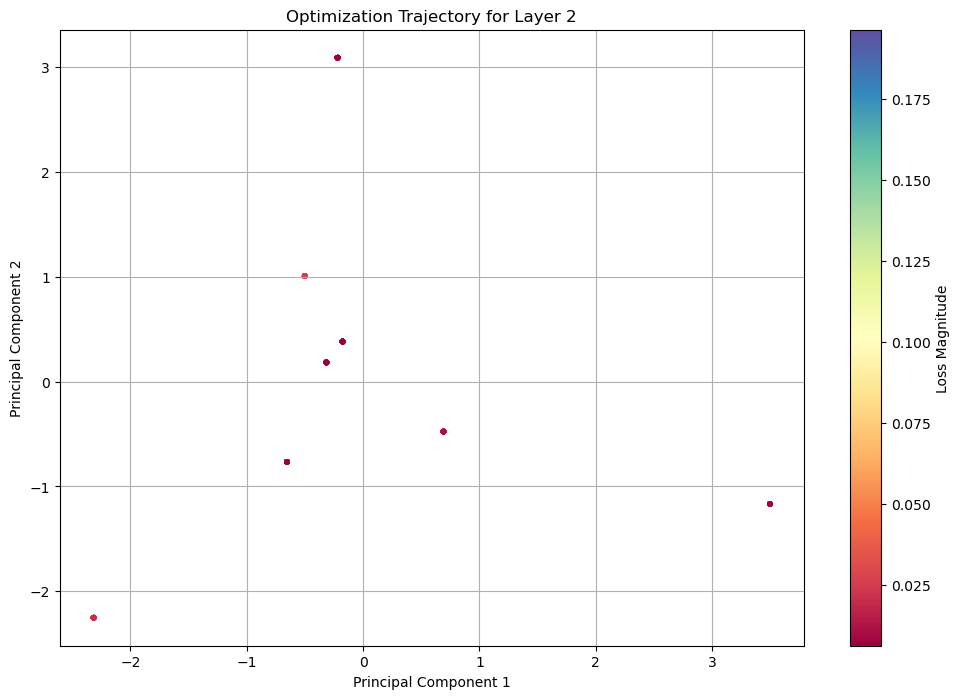

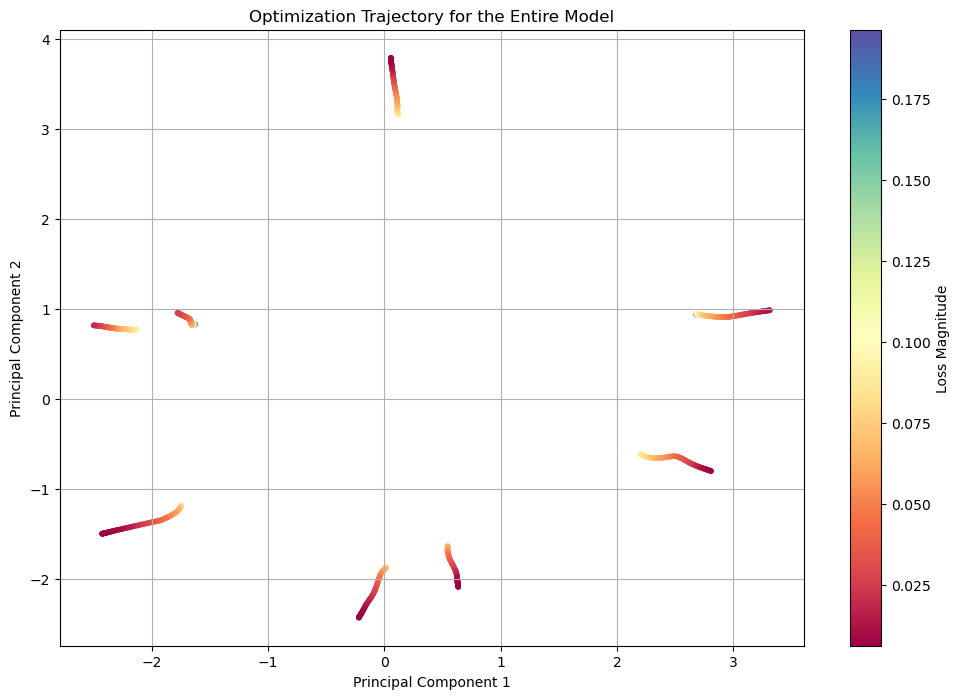

In [26]:
# Visualizing the optimization trajectories
visualize_optimization(reduced_layer2, model_losses, "Optimization Trajectory for Layer 2")
visualize_optimization(reduced_model, model_losses, "Optimization Trajectory for the Entire Model")